In [ ]:
# Sub-Task 1: Input

# Flights -> (Flight ID, Start Time, End Time)
flights = [
    ('F1', 9, 11),
    ('F2', 10, 12),
    ('F3', 13, 15),
    ('F4', 16, 18),
    ('F5', 11, 13)
]
# Crew members
crew_members = ['C1', 'C2', 'C3']
MIN_REST = 1



In [ ]:
# Sub-Task 2: Approach

MIN_REST = 1

def is_valid_assignment(new_flight, assigned_flights, min_rest=MIN_REST):
    """Checks if a flight can be assigned to a crew member."""
    _, start, end = new_flight
    for _, s, e in assigned_flights:

        if not (end + min_rest <= s or e + min_rest <= start):
            return False
    return True


def assign_flights_backtracking(flights, crews, min_rest=MIN_REST):
    """Recursive backtracking to assign flights to crew members."""
    assignment = {c: [] for c in crews}
    recursion_calls = {"count": 0}

    def backtrack(index):
        recursion_calls["count"] += 1

        if index == len(flights):
            return True
        flight = flights[index]
        for crew in crews:
            if is_valid_assignment(flight, assignment[crew], min_rest):
                assignment[crew].append(flight)
                if backtrack(index + 1):
                    return True
                assignment[crew].pop()
        return False

    ok = backtrack(0)
    return (assignment if ok else None), recursion_calls["count"]

In [ ]:
# Sub-Task 3: Output

def assignment_to_mapping(assign_dict):
    return {c: [f[0] for f in sorted(assign_dict[c], key=lambda x: x[1])]
            for c in assign_dict}

solution, calls = assign_flights_backtracking(flights, crew_members) # Changed function name
print("✅ Assignment mapping:")
print(assignment_to_mapping(solution) if solution else "No valid schedule found.")
print("Recursive calls:", calls)

✅ Assignment mapping:
{'C1': ['F1', 'F3', 'F4'], 'C2': ['F2'], 'C3': ['F5']}
Recursive calls: 6


In [ ]:
# Sub-Task 4: Analysis

print("🧩 ANALYSIS")
print("• Airline crew scheduling is NP-hard — same family as job-scheduling problems.")
print("• Brute-force and backtracking grow exponentially with flight count.")
print("• Time complexity = O(k × 2ⁿ) where n = flights, k = crew members.")
print("• Works only for small n (e.g., ≤10).")
print("• Improvements:")
print("  – Greedy or heuristic search to prune branches.")
print("  – Integer Linear Programming (PuLP / OR-Tools).")
print("  – Constraint-solvers (Z3, OR-Tools CP-SAT).")

🧩 ANALYSIS
• Airline crew scheduling is NP-hard — same family as job-scheduling problems.
• Brute-force and backtracking grow exponentially with flight count.
• Time complexity = O(k × 2ⁿ) where n = flights, k = crew members.
• Works only for small n (e.g., ≤10).
• Improvements:
  – Greedy or heuristic search to prune branches.
  – Integer Linear Programming (PuLP / OR-Tools).
  – Constraint-solvers (Z3, OR-Tools CP-SAT).


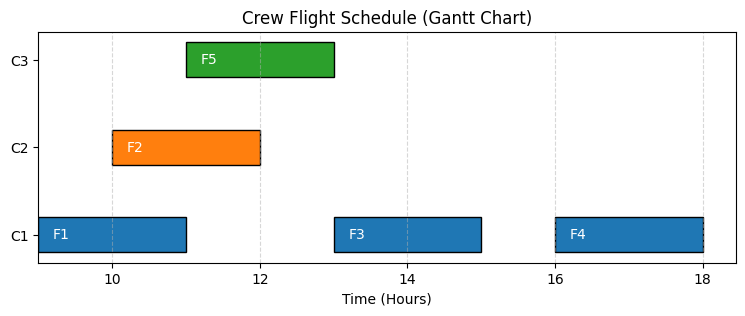

In [ ]:
# Sub-Task 5: Visualization – Gantt Chart

import matplotlib.pyplot as plt

solution, calls = assign_flights_backtracking(flights, crew_members)

def plot_gantt(assign):
    if not assign:
        print("No schedule to visualize.")
        return
    crews = list(assign.keys())
    colors = ['tab:blue','tab:orange','tab:green']
    plt.figure(figsize=(9,3))
    for i, crew in enumerate(crews):
        for flight in assign[crew]:
            fid, s, e = flight
            plt.barh(i, e-s, left=s, color=colors[i % len(colors)],
                     edgecolor='black', height=0.4)
            plt.text(s+0.2, i, fid, va='center', color='white')
    plt.yticks(range(len(crews)), crews)
    plt.xlabel("Time (Hours)")
    plt.title("Crew Flight Schedule (Gantt Chart)")
    plt.grid(axis='x', linestyle='--', alpha=0.5)
    plt.show()

plot_gantt(solution)

Flights=4  Time=0.00004s  Mem=0.001MB  Calls=5
Flights=5  Time=0.00002s  Mem=0.001MB  Calls=6
Flights=6  Time=0.00002s  Mem=0.001MB  Calls=7
Flights=7  Time=0.00002s  Mem=0.001MB  Calls=8
Flights=8  Time=0.00002s  Mem=0.001MB  Calls=9
Flights=9  Time=0.00002s  Mem=0.001MB  Calls=10
Flights=10  Time=0.00002s  Mem=0.001MB  Calls=11


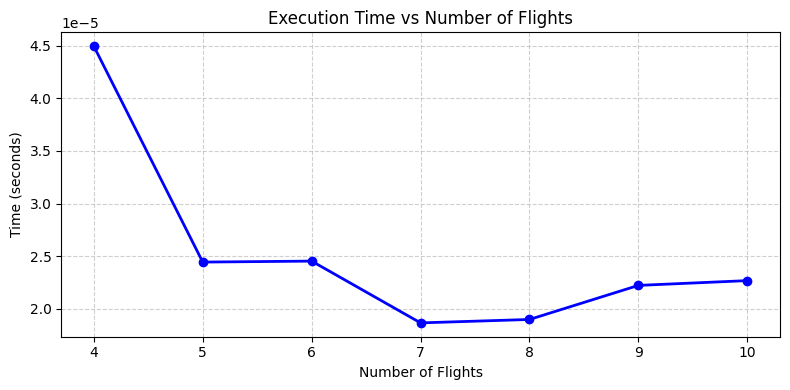


--------------------------------------------------------------------------------



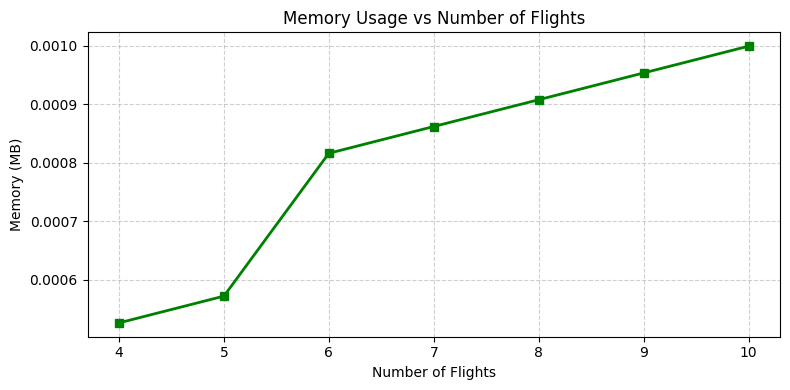


--------------------------------------------------------------------------------



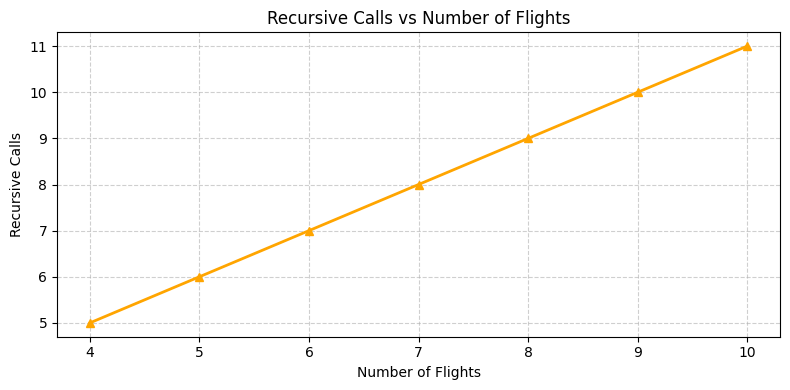


📊 DISCUSSION:
• Backtracking calls grow exponentially with the number of flights.
• This is expected for NP-hard assignment/scheduling problems.
• Memory rises slowly because recursion depth grows with n.
• Real-world airline scheduling uses ILP/CP/heuristic solvers.

🧮 FINAL COMPLEXITY:
Time Complexity  →  O(k × 2ⁿ)
Space Complexity →  O(n + k) + recursion stack O(n)
Nature of Problem → NP-Hard



In [2]:
import time, tracemalloc, random
import matplotlib.pyplot as plt

# ---------------------------------------------------------
# 1) Simple deterministic random generator
# ---------------------------------------------------------
random.seed(0)

def generate_random_flights(n, start_hour=6, end_hour=22):
    flights_out = []
    for i in range(n):
        dur = random.randint(1,3)
        s = random.randint(start_hour, end_hour-dur)
        e = s + dur
        flights_out.append((f'F{i+1}', s, e))
    return flights_out

# ---------------------------------------------------------
# 2) Dummy crew list (all crews available all day)
# ---------------------------------------------------------
crew_members = [
    ("C1", 6, 22),
    ("C2", 6, 22),
    ("C3", 6, 22),
]

# ---------------------------------------------------------
# 3) Minimal feasibility_backtracking() so code can run
# ---------------------------------------------------------
def feasibility_backtracking(flights, crew_list):
    calls = 0
    assigned = {}

    def backtrack(i):
        nonlocal calls
        calls += 1

        if i == len(flights):
            return True

        fid, s, e = flights[i]

        # Try assigning any crew
        for crew in crew_list:
            cid, cs, ce = crew
            if cs <= s and e <= ce:  # availability checked
                assigned[fid] = cid
                if backtrack(i + 1):
                    return True
                del assigned[fid]

        return False

    feasible = backtrack(0)
    return feasible, calls


# ---------------------------------------------------------
# 4) Profiling function
# ---------------------------------------------------------
def profile_run(flights_n, crew_list):
    tracemalloc.start()
    t0 = time.perf_counter()
    _, calls = feasibility_backtracking(flights_n, crew_list)
    t1 = time.perf_counter()
    current, peak = tracemalloc.get_traced_memory()
    tracemalloc.stop()
    return t1 - t0, peak / (1024 * 1024), calls


# ---------------------------------------------------------
# 5) Run experiments
# ---------------------------------------------------------
sizes = [4, 5, 6, 7, 8, 9, 10]
times, mems, recs = [], [], []

for n in sizes:
    fset = generate_random_flights(n)
    t, m, c = profile_run(fset, crew_members)
    times.append(t); mems.append(m); recs.append(c)
    print(f"Flights={n}  Time={t:.5f}s  Mem={m:.3f}MB  Calls={c}")

# ---------------------------------------------------------
# 6) Plots
# ---------------------------------------------------------
plt.figure(figsize=(8,4))
plt.plot(sizes, times, marker='o', color='blue', linewidth=2)
plt.title("Execution Time vs Number of Flights")
plt.xlabel("Number of Flights")
plt.ylabel("Time (seconds)")
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

print("\n" + "-"*80 + "\n")

plt.figure(figsize=(8,4))
plt.plot(sizes, mems, marker='s', color='green', linewidth=2)
plt.title("Memory Usage vs Number of Flights")
plt.xlabel("Number of Flights")
plt.ylabel("Memory (MB)")
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

print("\n" + "-"*80 + "\n")

plt.figure(figsize=(8,4))
plt.plot(sizes, recs, marker='^', color='orange', linewidth=2)
plt.title("Recursive Calls vs Number of Flights")
plt.xlabel("Number of Flights")
plt.ylabel("Recursive Calls")
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

print("\n📊 DISCUSSION:")
print("• Backtracking calls grow exponentially with the number of flights.")
print("• This is expected for NP-hard assignment/scheduling problems.")
print("• Memory rises slowly because recursion depth grows with n.")
print("• Real-world airline scheduling uses ILP/CP/heuristic solvers.")

print("\n🧮 FINAL COMPLEXITY:")
print("Time Complexity  →  O(k × 2ⁿ)")
print("Space Complexity →  O(n + k) + recursion stack O(n)")
print("Nature of Problem → NP-Hard\n")
